<a href="https://colab.research.google.com/github/NatashaYuzhakova/Practical-task-1/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%E2%84%964_CNN_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Шаг 1. Загрузка данных

## 1.1. Используйте набор данных для задачи классификации изображений (например, набор данных CIFAR-10).

## 1.2. Загрузите данные и разделите их на тренировочный и тестовый наборы.

In [1]:
import tensorflow as tf # Импортируем библиотеки
from tensorflow import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
cifar100 = tf.keras.datasets.cifar100 # Загружаем наш набор данных cifar100
(x_train, y_train), (x_val, y_val) = cifar100.load_data()
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape) # Узнаем и выводим на экран количество элементов

169001437/169001437 [==============================] - 3s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [3]:
print(x_train.shape, y_train.shape, x_val.shape, y_val.dtype) #???????

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) int64


In [4]:
print(x_train[10]) # Выведем на экран десятое изображение в виде массива

[[[ 83 132 178]
  [ 67 114 160]
  [ 61 108 154]
  ...
  [  9  26  57]
  [ 16  34  66]
  [ 35  59  94]]

 [[ 75 124 173]
  [ 71 119 167]
  [ 55 103 152]
  ...
  [ 39  67 107]
  [  9  28  65]
  [ 12  31  66]]

 [[ 73 121 173]
  [ 68 115 166]
  [ 74 122 172]
  ...
  [ 91 132 178]
  [ 53  83 125]
  [ 14  34  70]]

 ...

 [[159 187 223]
  [150 146 159]
  [191 154 143]
  ...
  [152 131 136]
  [173 143 158]
  [122 123 150]]

 [[157 171 202]
  [155 133 132]
  [183 152 141]
  ...
  [213 168 159]
  [196 146 153]
  [169 157 180]]

 [[150 160 186]
  [155 127 122]
  [179 149 139]
  ...
  [212 159 148]
  [187 136 135]
  [148 135 154]]]


In [5]:
import matplotlib.pyplot as plt # импорт библиотек для визуализации данных
%matplotlib inline

(-0.5, 31.5, 31.5, -0.5)

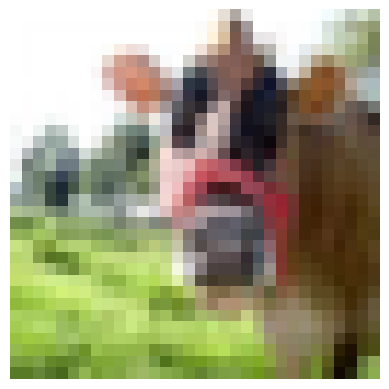

In [6]:
plt.imshow(x_train[0], cmap='binary') # Выведем на экран хранящееся в X_train[0] изображение
plt.axis('off')

In [7]:
print(cifar100.load_data())

((array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [195, 205, 193],
         [212, 224, 204],
         [182, 194, 167]],

        [[255, 255, 255],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [170, 176, 150],
         [161, 168, 130],
         [146, 154, 113]],

        [[255, 255, 255],
         [254, 254, 254],
         [255, 255, 255],
         ...,
         [189, 199, 169],
         [166, 178, 130],
         [121, 133,  87]],

        ...,

        [[148, 185,  79],
         [142, 182,  57],
         [140, 179,  60],
         ...,
         [ 30,  17,   1],
         [ 65,  62,  15],
         [ 76,  77,  20]],

        [[122, 157,  66],
         [120, 155,  58],
         [126, 160,  71],
         ...,
         [ 22,  16,   3],
         [ 97, 112,  56],
         [141, 161,  87]],

        [[ 87, 122,  41],
         [ 88, 122,  39],
         [101, 134,  56],
         ...,
         [ 34,  36,  10],
      

## Шаг 2. Создание сверточной нейронной сети

# 2.1. Импортируйте необходимые библиотеки, такие как TensorFlow и Keras.

# 2.2. Создайте сверточную нейронную сеть с несколькими сверточными слоями, слоями подвыборки (pooling), плотными слоями и выходным слоем.

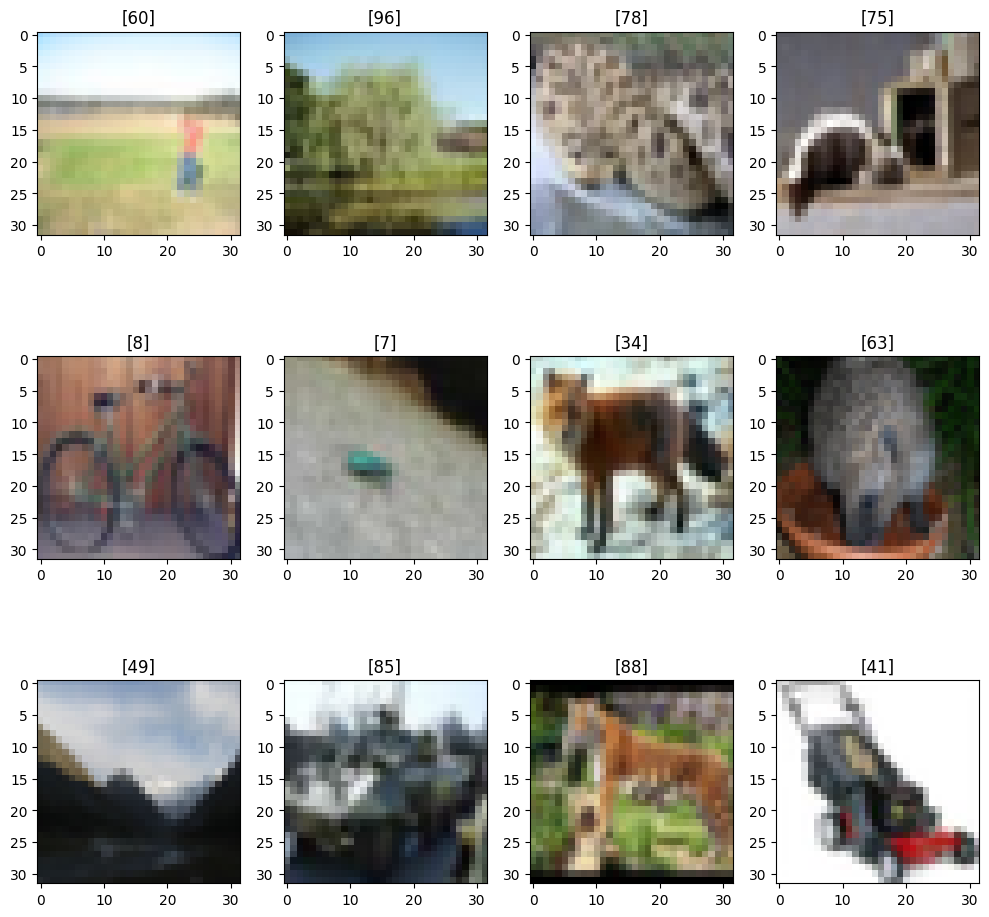

In [8]:
def show_samples(data, labels): # Выводим часть образцов на экран
    plt.subplots(figsize=(10, 10))
    for i in range(12):
        plt.subplot(3, 4, i+1)
        k = np.random.randint(0, data.shape[0])
        plt.title(labels[k])
        plt.imshow(data[k])
    plt.tight_layout()
    plt.show()


show_samples(x_train, y_train)

In [9]:
y_train = tf.one_hot(y_train, # Делим данные на проверку и обучение
                     depth=y_train.max() + 1,
                     dtype=tf.float64)
y_val = tf.one_hot(y_val,
                   depth=y_val.max() + 1,
                   dtype=tf.float64)

y_train = tf.squeeze(y_train)
y_val = tf.squeeze(y_val)


# Шаг 2. Создание сверточной нейронной сети

## 2.1. Импортируйте необходимые библиотеки, такие как TensorFlow и Keras.

## 2.2. Создайте сверточную нейронную сеть с несколькими сверточными слоями, слоями подвыборки (pooling), плотными слоями и выходным слоем.

In [10]:

model = tf.keras.models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu',
                  input_shape=(32, 32, 3), padding='same'),
    layers.Conv2D(32, (3, 3), # Сверточный слой с 32 фильтрами, каждый размером 3x3.Функция активации ReLU
                  activation='relu',
                  padding='same'),
    layers.Conv2D(64, (3, 3), #Сверточный слой с 64 фильтрами, каждый размером 3x3
                  activation='relu',
                  padding='same'),
    layers.MaxPooling2D(2, 2),  #Максимальный слой пула с размером пула 2x2. Функция активации ReLU
    layers.Conv2D(128, (3, 3),
                  activation='relu',
                  padding='same'),


    layers.Flatten(), #Сгладить слой
    layers.Dense(256, activation='relu'), #Плотный слой с 256 нейронами и функцией активации ReLU
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(100, activation='softmax') #Плотный слой с 10 нейронами и функцией активации softmax
])

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['AUC', 'accuracy']
)


In [11]:
model.summary() # Печатаем сводку параметров

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                        

# Шаг 3. Обучение сверточной нейронной сети

## 3.1. Настройте параметры обучения, такие как оптимизатор, функция потерь и метрики.

## 3.2. Обучите сверточную нейронную сеть на тренировочных данных с использованием метода fit().

In [12]:
hist = model.fit(x_train, y_train,
                 epochs=5,
                 batch_size=64,
                 verbose=1,
                 validation_data=(x_val, y_val)) # acc – точность классификации на обучающих данных;loss – значение функции потерь на обучающих данных;val_acc – точность классификации на проверочных данных;val_loss – значение функции потерь на проверочных данных.

Epoch 1/5
782/782 [==============================] - 622s 784ms/step - loss: 3.9389 - auc: 0.7803 - accuracy: 0.1056 - val_loss: 3.3612 - val_auc: 0.8621 - val_accuracy: 0.1969
Epoch 2/5
782/782 [==============================] - 608s 777ms/step - loss: 3.1832 - auc: 0.8782 - accuracy: 0.2225 - val_loss: 3.7884 - val_auc: 0.8495 - val_accuracy: 0.2082
Epoch 3/5
782/782 [==============================] - 612s 783ms/step - loss: 2.7271 - auc: 0.9136 - accuracy: 0.3102 - val_loss: 2.6768 - val_auc: 0.9122 - val_accuracy: 0.3362
Epoch 4/5
782/782 [==============================] - 588s 752ms/step - loss: 2.3390 - auc: 0.9375 - accuracy: 0.3923 - val_loss: 2.3664 - val_auc: 0.9323 - val_accuracy: 0.3971
Epoch 5/5
782/782 [==============================] - 593s 759ms/step - loss: 1.9883 - auc: 0.9544 - accuracy: 0.4655 - val_loss: 2.3339 - val_auc: 0.9268 - val_accuracy: 0.4084


In [13]:
model.evaluate(x_val, y_val)
print()

313/313 [==============================] - 29s 94ms/step - loss: 2.3339 - auc: 0.9268 - accuracy: 0.4084



In [14]:
temp = model.get_layer('conv2d_3')
last_output = temp.output
last_output.shape

TensorShape([None, 16, 16, 128])

In [15]:
x = layers.Flatten()(last_output)

x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)

x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.BatchNormalization()(x)

output = layers.Dense(10, activation='softmax')(x)

model_new = keras.Model(model.input, output)

In [16]:
model_new.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       73856     
                                                             

In [17]:
model_new.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['AUC', 'accuracy']
)

In [18]:
# Загружаем данные
cifar10 = tf.keras.datasets.cifar10

# Разделяем на проверку и обучение
(x_train, y_train), (x_val, y_val) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [19]:
y_train = tf.one_hot(y_train, depth=10,
                     dtype=tf.float64)
y_val = tf.one_hot(y_val, depth=10,
                   dtype=tf.float64)

y_train = tf.squeeze(y_train)
y_val = tf.squeeze(y_val)

In [20]:
history = model_new.fit(x_train, y_train,
                        batch_size=64,
                        epochs=5,
                        verbose=1,
                        validation_data=(x_val, y_val)) # acc – точность классификации на обучающих данных;loss – значение функции потерь на обучающих данных;val_acc – точность классификации на проверочных данных;val_loss – значение функции потерь на проверочных данных.

Epoch 1/5
782/782 [==============================] - 585s 745ms/step - loss: 1.0893 - auc: 0.9325 - accuracy: 0.6232 - val_loss: 0.8825 - val_auc: 0.9550 - val_accuracy: 0.6957
Epoch 2/5
782/782 [==============================] - 579s 740ms/step - loss: 0.7123 - auc: 0.9702 - accuracy: 0.7503 - val_loss: 0.8436 - val_auc: 0.9586 - val_accuracy: 0.7125
Epoch 3/5
782/782 [==============================] - 578s 739ms/step - loss: 0.5908 - auc: 0.9789 - accuracy: 0.7930 - val_loss: 0.8711 - val_auc: 0.9573 - val_accuracy: 0.7096
Epoch 4/5
782/782 [==============================] - 576s 736ms/step - loss: 0.3585 - auc: 0.9916 - accuracy: 0.8749 - val_loss: 0.8876 - val_auc: 0.9568 - val_accuracy: 0.7270
Epoch 5/5
782/782 [==============================] - 574s 734ms/step - loss: 0.1982 - auc: 0.9970 - accuracy: 0.9319 - val_loss: 1.0258 - val_auc: 0.9471 - val_accuracy: 0.7231


# Шаг 4. Оценка производительности модели

## 4.1. Оцените производительность обученной модели на тестовых данных, используя метод evaluate().

## 4.2. Опубликуйте ссылку на Github в LMS Odin.

In [31]:
model_new.evaluate(x_val, y_val)
print()

313/313 [==============================] - 29s 92ms/step - loss: 1.0258 - auc: 0.9471 - accuracy: 0.7231

